# ask gpt4v
> ask gpt4v via openai api

In [ ]:
#|default_exp ninjalabo.llmcam.gpt4v

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#|export
import json
import base64
import requests
from openai import OpenAI

In [ ]:
from IPython.display import Image
import glob

In [ ]:
files = sorted(glob.glob("../data/cap_*.jpg"))
len(files), files[:9]

(473,
 ['../data/cap_2024.09.28_15:59:06_Presidentinlinna.jpg',
  '../data/cap_2024.09.28_16:00:11_Presidentinlinna.jpg',
  '../data/cap_2024.09.28_16:01:16_Etelasatama.jpg',
  '../data/cap_2024.09.28_16:02:21_Etelasatama.jpg',
  '../data/cap_2024.09.28_16:05:31_Olympiaterminaali.jpg',
  '../data/cap_2024.09.28_16:06:36_Olympiaterminaali.jpg',
  '../data/cap_2024.09.28_16:07:41_Torni.jpg',
  '../data/cap_2024.09.28_16:09:51_Tuomiokirkko.jpg',
  '../data/cap_2024.09.28_16:15:11_Presidentinlinna.jpg'])

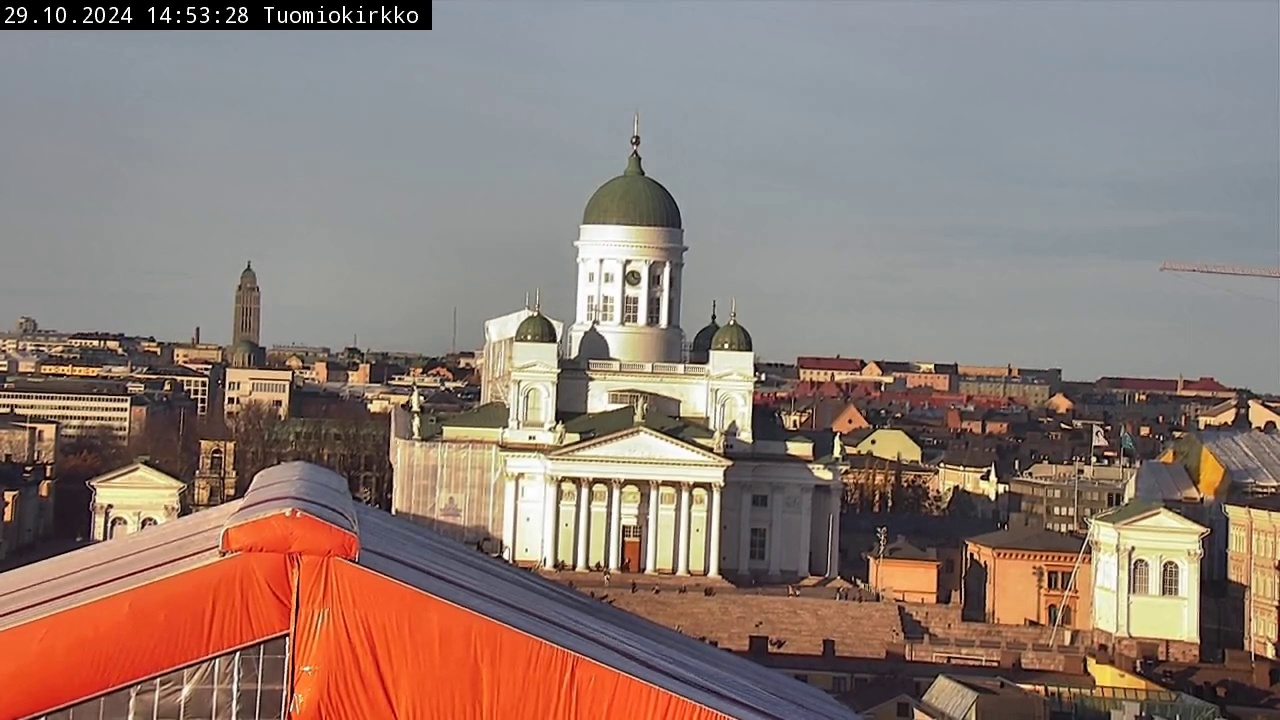

In [ ]:
Image(files[-1])

In [ ]:
#|export
def encode_image(fname: str):
    "encode an image file as base64"
    with open(fname, "rb") as f:
        return base64.b64encode(f.read()).decode('utf-8')

In [ ]:
show_doc(encode_image)

---

### encode_image

>      encode_image (fname:str)

*encode an image file as base64*

In [ ]:
base64_image = encode_image(files[0])
base64_image[:9]

'/9j/4AAQS'

In [ ]:
#|eval: false
api = OpenAI()

In [ ]:
def ask(api:OpenAI, question:str):
    completion = api.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "user", "content": question}
            ]
        )
    return completion.choices[0].message.content

In [ ]:
#|eval: false
ans = ask(api, "The capital of Finland")
assert "Helsinki" in ans

In [ ]:
#|export
def info(response):
    txt = json.loads(response.json())['choices'][0]['message']['content']
    data = json.loads(txt.replace('```json\n', "").replace('\n```', ""))
    return data

In [ ]:
question = """
    Describe this image quantitatively as many as possible in json format.
    
    Here's the example:
    {'timestamp': '2024-10-06T19:04:14',
     'location': 'Kauppatori',
     'dimensions': {'width': 1280, 'height': 720},
     'buildings': {'number_of_buildings': 10,
      'building_height_range': '3-5 stories'},
     'vehicles': {'number_of_vehicles': 5, 'types': ['cars', 'trucks'], number_of_available_parking_space: 3},
     'waterbodies': {'visible': True, 'type': 'harbor', 'number_of_boats': 4},
     'street_lights': {'number_of_street_lights': 20},
     'people': {'approximate_number': 10},
     'lighting': {'time_of_day': 'evening', 'artificial_lighting': 'prominent'},
     'visibility': {'clear': True},
     'sky': {'visible': True, 'light_conditions': 'dusk'}}
    """

In [ ]:
def ask_image(api:OpenAI, fname:str, question:str):
    response = api.chat.completions.create(
      model="gpt-4o",
      messages=[
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": question,
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{encode_image(fname)}",
                "detail": "high",
              },
            },
            # {
            #   "type": "image_url",
            #   "image_url": {
            #     "url": f"data:image/jpeg;base64,{encode_image(files[1])}"
            #   },
            # },
          ],
        }
      ],
      max_tokens=300,
    )
    return info(response)

In [ ]:
#|eval: false
ask_image(api, files[0], question)

{'timestamp': '2024-09-28T15:59:06',
 'location': 'Presidentinlinna',
 'dimensions': {'width': 1280, 'height': 720},
 'buildings': {'number_of_buildings': 12,
  'building_height_range': '3-6 stories'},
 'vehicles': {'number_of_vehicles': 20,
  'types': ['cars', 'vans'],
  'number_of_available_parking_space': 10},
 'waterbodies': {'visible': True, 'type': 'harbor', 'number_of_boats': 10},
 'street_lights': {'number_of_street_lights': 15},
 'people': {'approximate_number': 30},
 'lighting': {'time_of_day': 'afternoon', 'artificial_lighting': 'minimal'},
 'visibility': {'clear': True},
 'sky': {'visible': True, 'light_conditions': 'day'}}

In [ ]:
#| export
class gpt4v:
    def __init__(self):
        self.api = OpenAI()

    def ask_text(self, question):
        completion = self.api.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "user", "content": question}
            ]
        )
        return completion.choices[0].message.content

    def ask(self, fname, question=question):
        response = self.api.chat.completions.create(
          model="gpt-4o",
          messages=[
            {
              "role": "user",
              "content": [
                {
                  "type": "text",
                  "text": question,
                },
                {
                  "type": "image_url",
                  "image_url": {
                    "url": f"data:image/jpeg;base64,{encode_image(fname)}",
                    "detail": "high",
                  },
                },
                # {
                #   "type": "image_url",
                #   "image_url": {
                #     "url": f"data:image/jpeg;base64,{encode_image(files[1])}"
                #   },
                # },
              ],
            }
          ],
          max_tokens=300,
        )
        return info(response)

In [ ]:
#|eval: false
gpt4v = gpt4v()
ans = gpt4v.ask_text("The capital of France?")
print(ans)
assert "Paris" in ans

The capital of France is Paris.


In [ ]:
#|eval: false
ans = gpt4v.ask(files[1])
ans
#FIXME: assert here!

{'timestamp': '2024-09-28T16:00:11',
 'location': 'Presidentinlinna',
 'dimensions': {'width': 1280, 'height': 720},
 'buildings': {'number_of_buildings': 8,
  'building_height_range': '4-6 stories'},
 'vehicles': {'number_of_vehicles': 20,
  'types': ['cars', 'vans'],
  'number_of_available_parking_space': 0},
 'waterbodies': {'visible': True, 'type': 'harbor', 'number_of_boats': 10},
 'street_lights': {'number_of_street_lights': 5},
 'people': {'approximate_number': 30},
 'lighting': {'time_of_day': 'afternoon', 'artificial_lighting': 'minimal'},
 'visibility': {'clear': True},
 'sky': {'visible': True, 'light_conditions': 'daylight'}}

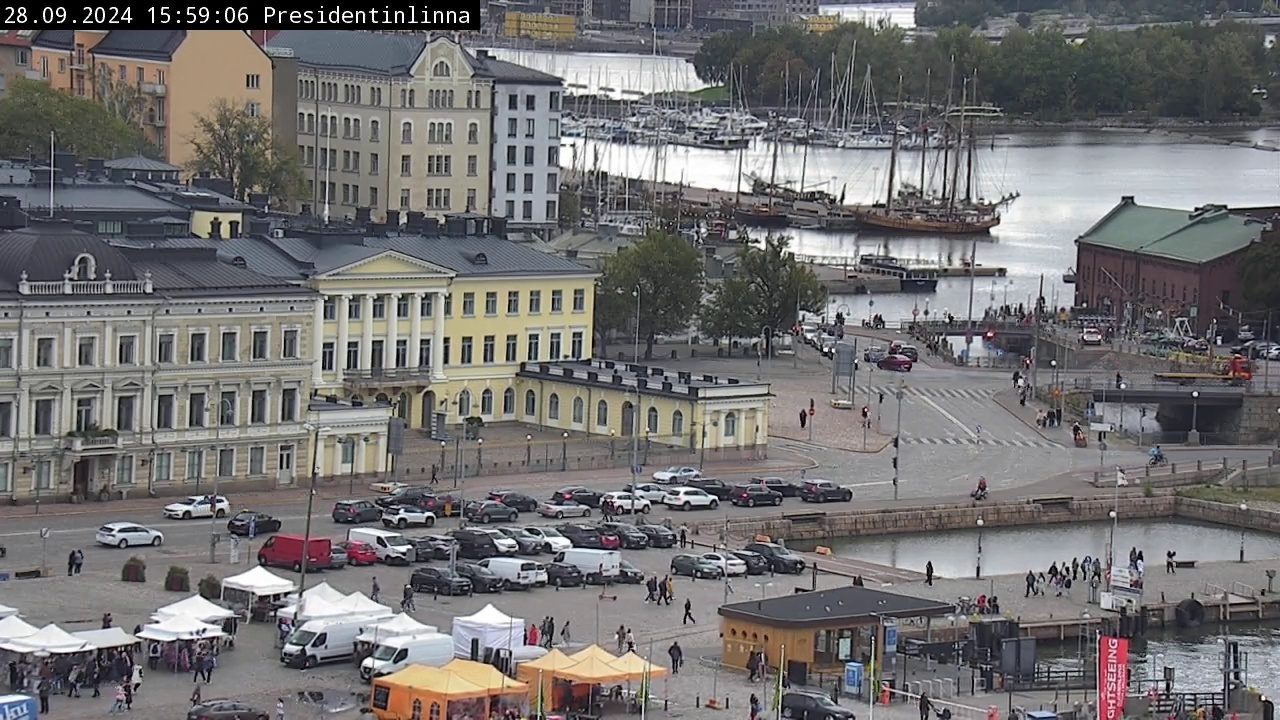

In [ ]:
Image(files[0])

In [ ]:
#|hide
import nbdev; nbdev.nbdev_export()